<a href="https://colab.research.google.com/github/Manujk-123/Marvel-Task-Level-1/blob/main/Image_classification_using_KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Image Classification using KMeans Clustering**
KMeans clustering can be applied to image data for classification in an unsupervised manner, meaning the model doesn't need labels to group the data. In this case, the goal is to assign images into clusters and then interpret each cluster as a class.</br>

###**Steps to Implement Image Classification using KMeans:**
- **Load the Image Dataset:** We'll use a dataset such as **Fashion MNIST** or **CIFAR-10.**
- **Preprocess the Data:** This typically includes flattening the image data and scaling it.
- **Apply KMeans Clustering:** Use KMeans to find clusters in the dataset.
- **Interpret the Clusters:** Once the clustering is done, you can visualize or assign labels to the clusters.</br>



Let us classify a given set of images into a given number of categories using KMeans Clustering using **Fashion MNIST** dataset

In [ ]:
#Import Libraries and Load Dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import fashion_mnist


In [ ]:
#Load and Preprocess the Fashion MNIST Dataset
# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Flatten the images from 28x28 to 784-dimensional vectors
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Normalize pixel values to the range [0, 1]
x_train_flat = x_train_flat / 255.0
x_test_flat = x_test_flat / 255.0

# Optionally, reduce dimensionality using PCA (optional but speeds up KMeans)
pca = PCA(n_components=50)
x_train_pca = pca.fit_transform(x_train_flat)
x_test_pca = pca.transform(x_test_flat)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
#Apply KMeans Clustering
# Set the number of clusters to 10
num_clusters = 10

# Fit the KMeans model to the data
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(x_train_pca)

# Predict the cluster assignments for the training data
y_kmeans = kmeans.predict(x_train_pca)


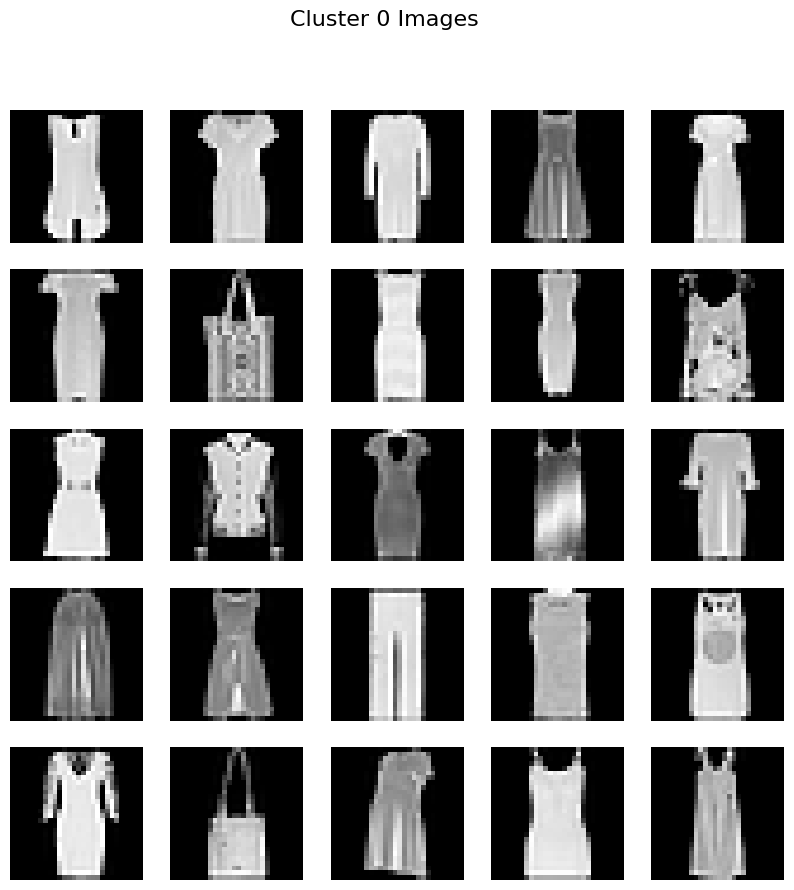

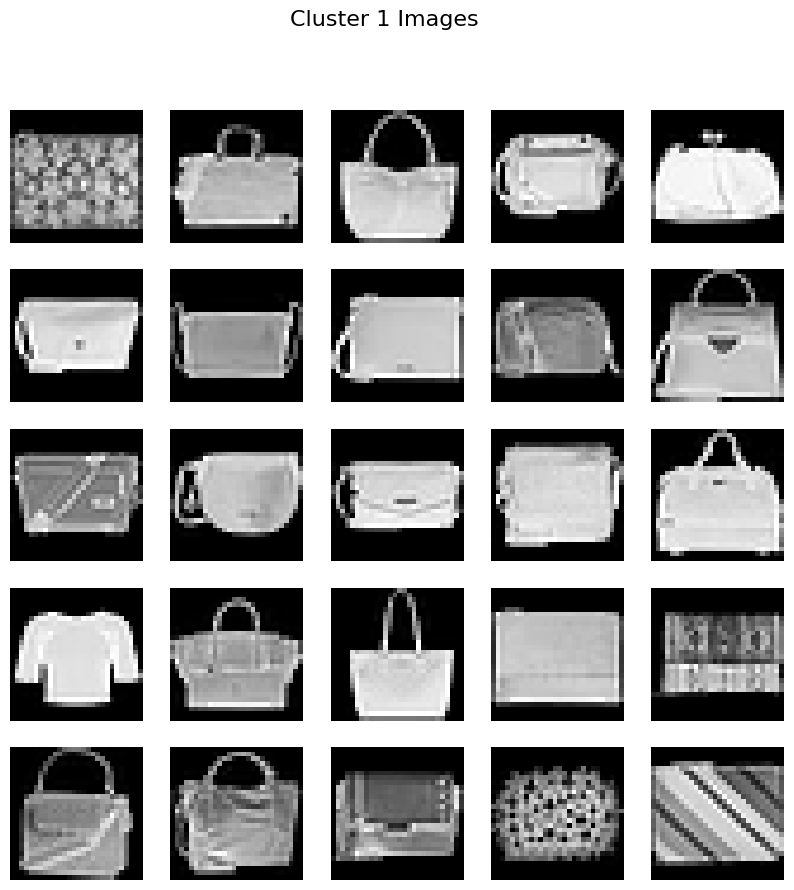

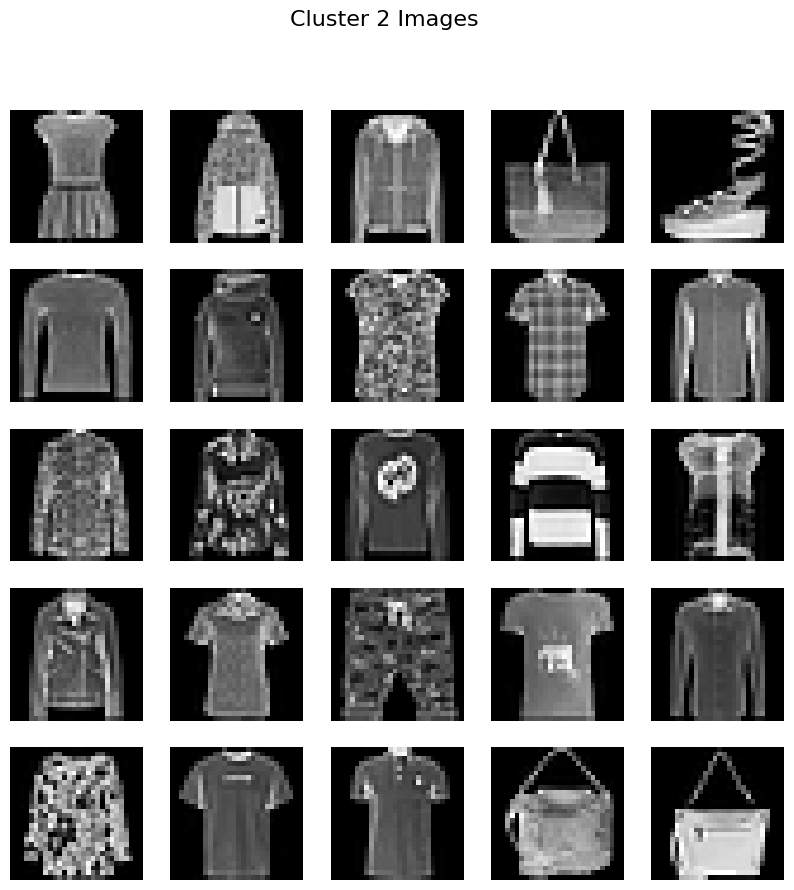

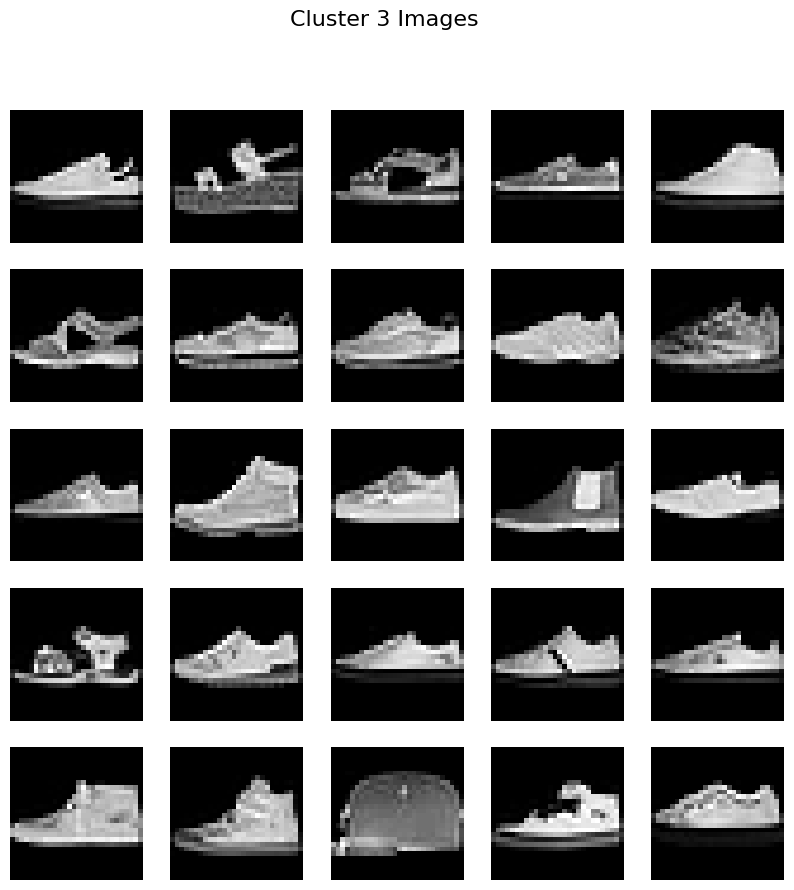

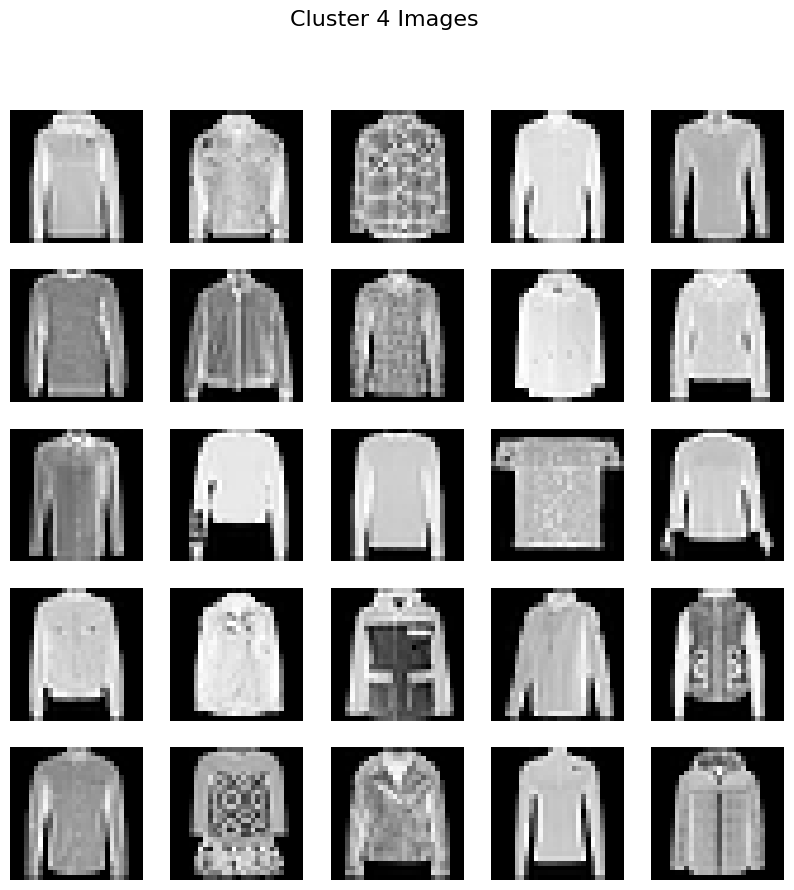

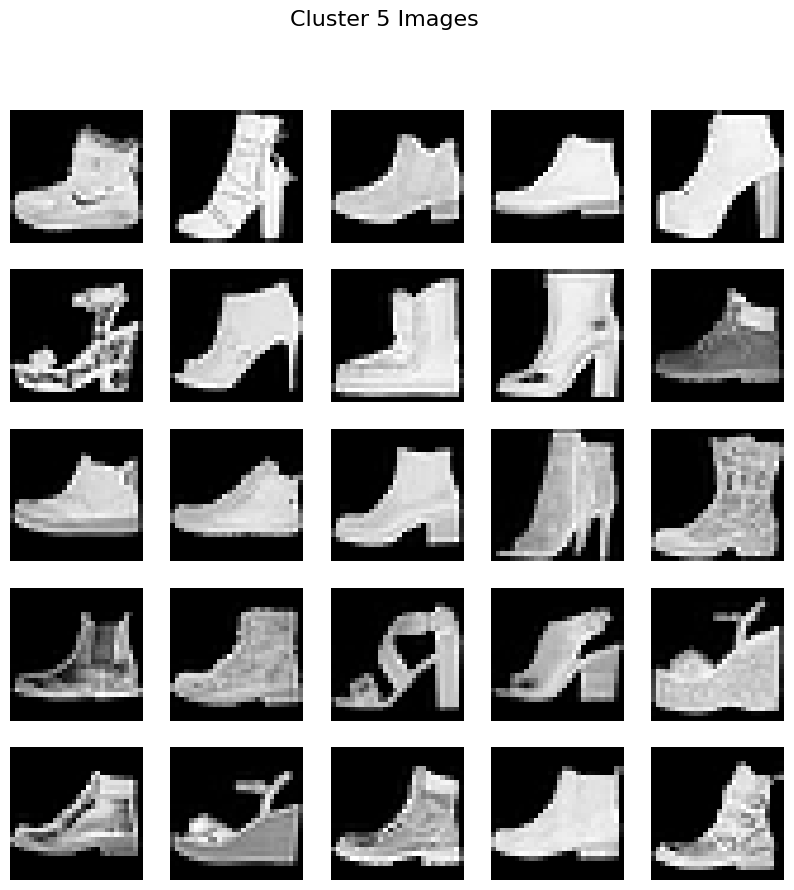

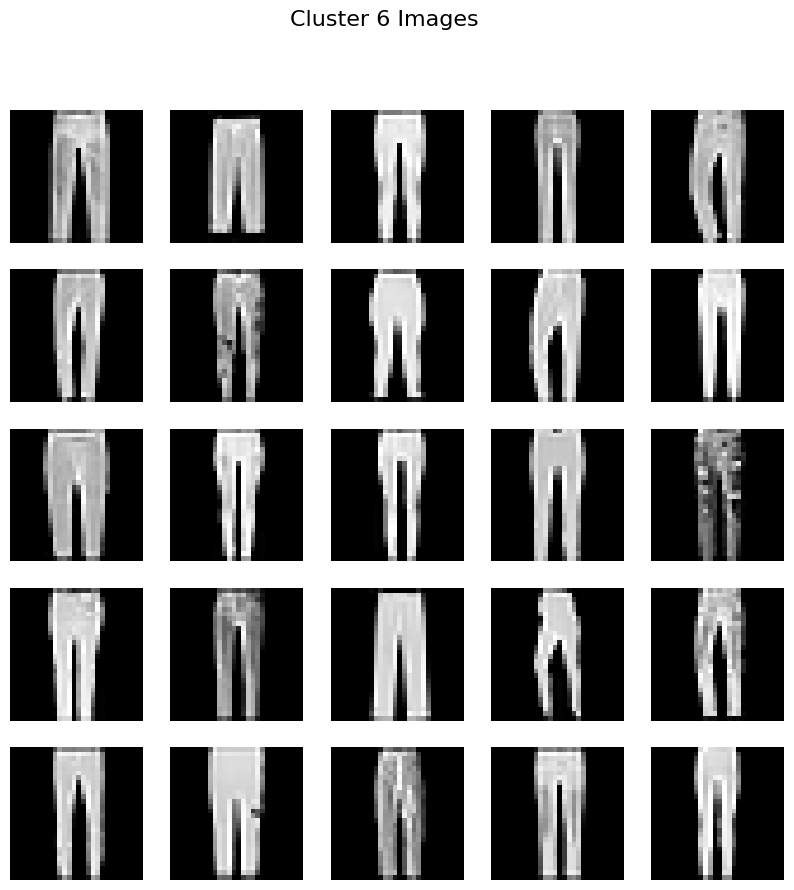

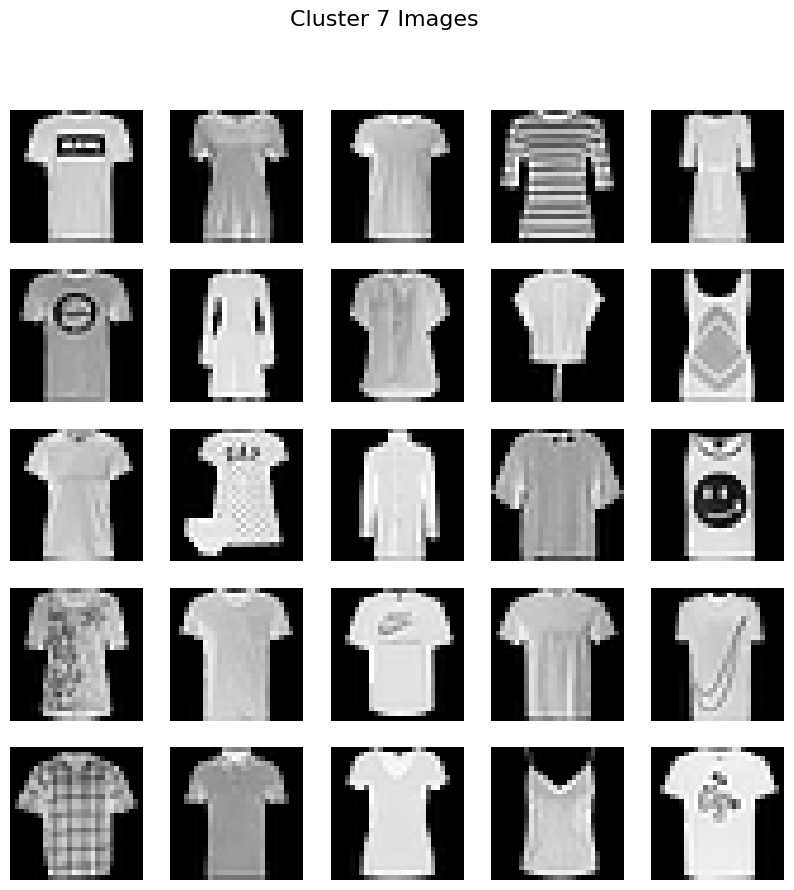

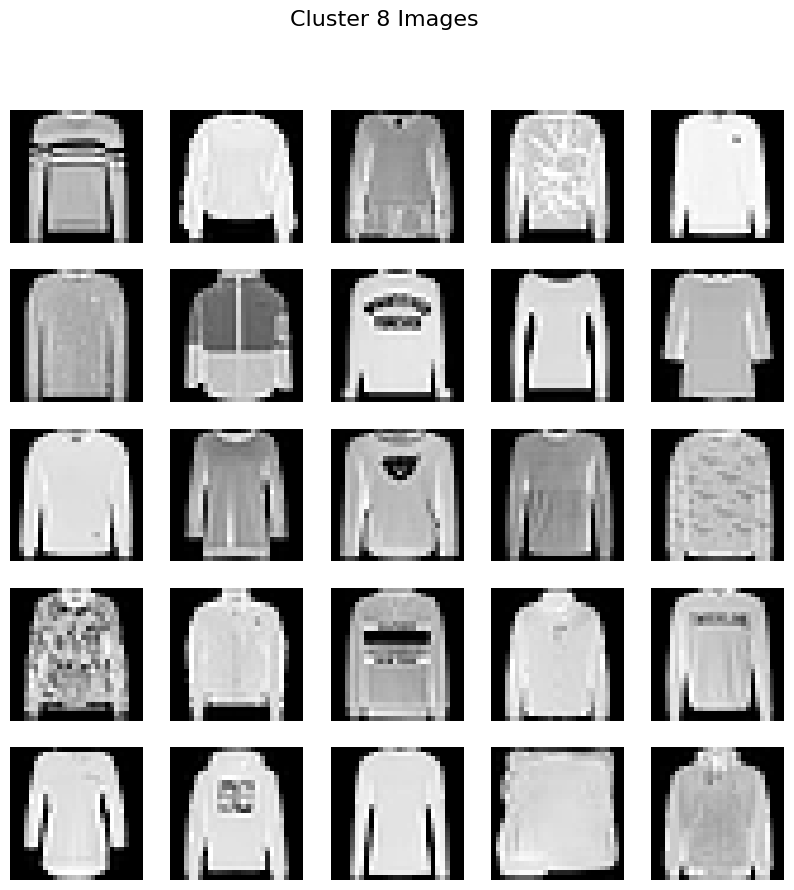

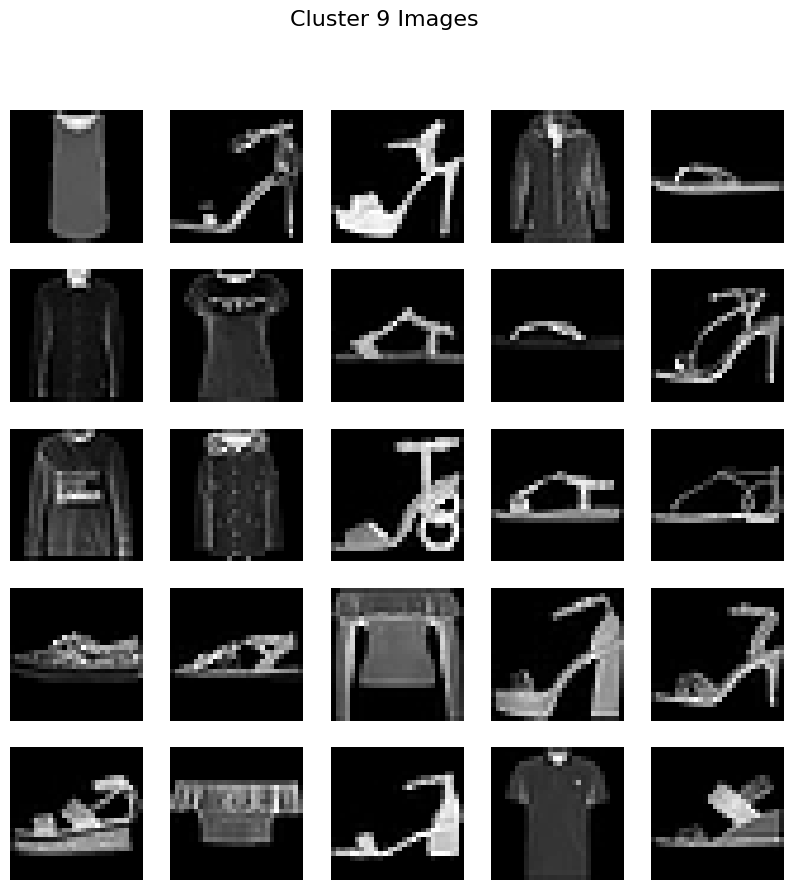

In [ ]:
#Visualizing the Results
# Visualize the first few images from each cluster
for i in range(num_clusters):
    cluster_images = x_train[y_kmeans == i]

    # Plot the first few images of the cluster
    plt.figure(figsize=(10, 10))
    for j in range(min(25, len(cluster_images))):  # Display up to 25 images per cluster
        plt.subplot(5, 5, j+1)
        plt.imshow(cluster_images[j], cmap='gray')
        plt.axis('off')
    plt.suptitle(f"Cluster {i} Images", fontsize=16)
    plt.show()
